<h1 style="text-align: center;">Desafío - Pruebas de hipótesis</h1>

- Para realizar este desafío debes haber estudiado previamente todo el material disponible correspondiente a la unidad.
- Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
- Desarrollo desafío: Individual.
Para la realización del desafío necesitarás apoyarte del archivo <a href="https://empieza.desafiolatam.com/cohorts/2091/sections/78278/activities/119107/items/610854">Apoyo Desafío - Pruebas de hipótesis</a>.

## Habilidades a evaluar
- Identificar la estandarización de variables mediante el cálculo de puntajes $z$.
- Conocer la distribución $t$ de Student y su aplicación.
- Aplicar pruebas de hipótesis simples en el contexto de la inferencia.

## Descripción
A partir del trabajo realizado en el Desafío anterior, la empresa para la cual trabajas, te ha solicitado continuar el análisis de datos pero, está vez, evaluando juicios de hipótesis e implementando funciones que faciliten el análisis de datos. Para ello, te entregan un material de apoyo el cual deberá servir como base para desarrollar los siguientes requerimientos.

## Requerimientos
A continuación revisaremos los requerimientos y acciones que la empresa a la cual postulas te pide realizar.

### 1. Evaluar juicios de hipótesis (2 puntos): 
Para evaluar la pertinencia de diversas hipótesis, se te solicita discernir si es posible rechazar la hipótesis nula.

- 75 individuos elegidos al azar fueron alcanzados por activistas pro-LGTB que se identificaron como homosexuales, y 75 alcanzados por activistas pro-LGTB que se identificaron como heterosexuales. El objetivo era medir actitudes frente a la adopción homoparental. La organización encargada de procesar los datos obtuvo los siguientes resultados:
>El 67% de los encuestados por heterosexuales se mostró a favor de la adopción homoparental ($p_{\text{heterosexuales}}$), mientras que un 72% de los encuestados por activistas que se identificaron como homosexuales se mostraron a favor de la adopción homoparental ($p_{\text{homosexuales}}$).
    
- Asumiendo que la hipótesis nula es que ambos porcentajes no son diferentes, y la hipótesis alternativa es que existe una diferencia substancial entre ambos.
$$
H_0: p_{\text{heterosexuales}} = p_{\text{homosexuales}} \\
H_1: p_{\text{heterosexuales}} \neq p_{\text{homosexuales}}
$$

- Con _p-valor_ de 0.1183 ¿es posible rechazar la hipótesis nula en favor de la alternativa con una confianza de 95%?

**Respuesta**:no se puede rechazar con un 95% de confianza

- ¿Cuanta es la confianza máxima con la que sería posible rechazar la hipótesis nula en favor de la alternativa con estos resultados?

**Respuesta**:0.8817

### 2. Importar la base de datos utilizada la sesión presencial anterior (2 puntos):
- Agregue una serie de variables binarias por cada continente de la variable region. _**Tip**_: Utilice np.where para ello.
- De manera similar a la sesión anterior, enfóquese en las siguientes variables:
    - **Apellidos desde la A hasta la N**: Enfocarse en las variables `chldmort`, `adfert` y `life`.
    - **Apellidos desde la N hasta la Z**: Enfocarse en las variables `femlab`, `literacy` y `school`.

In [1]:
# Utiliza esta celda par importar los módulos necesarios y el set de datos. Recuerda el encoding!
import pandas as pd
import numpy as np

df = pd.read_csv("nations.csv", encoding = "ISO-8859-1").drop(columns=["Unnamed: 0"])
df.head()
my_cols = ['chldmort','adfert','life']

In [4]:
# Utiliza esta celda para crear una variable binaria para cada continente (1: Pertenece al contiente, 0: No pertenece al continente)
# Esto añadirá 5 columnas a tu dataframe
regiones = df["region"].unique()
df["region_Africa"]=np.where(df["region"]=="Africa",1,0)
for region in regiones:
    df[f"region_{region}"] = np.where(df["region"] == region, 1,0)
df.head()

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini,region_Africa,region_Americas,region_Asia,region_Europe,region_Oceania
0,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN,1,0,0,0,0
1,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN,1,0,0,0,0
2,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN,1,0,0,0,0
3,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN,1,0,0,0,0
4,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999,1,0,0,0,0


### 3. Implementar una función de prueba de hipótesis a mano (3 puntos):
- La función debe ingresar los siguientes argumentos:
    - `data`: La tabla de datos.
    - `variable`: La variable a analizar.
    - `binarize`: El indicador binario a utilizar.
    
_**Tip**_:
- Separe la variable en dos, utilizando el indicador binario. Recuerde eliminar los perdidos con `dropna()`.
- Implemente `ttest_ind` de `scipy.stats` y guarde el valor $t$ y _p-value_.
- Reporte las medias para cada grupo (0 y 1).
- Reporte la diferencia de entre las medias.
- Reporte los valores $t$ y _p-value_.

In [6]:
# Utiliza esta celda para definir la función
from scipy.stats import ttest_ind
def test_hipotesis(df, variable, binarize):
    ceros = df[df[binarize] == 0][variable].dropna()
    unos = df[df[binarize] == 1][variable].dropna()
    
    ceros_mean = ceros.mean()
    unos_mean = unos.mean()
    dif_medias = ceros_mean - unos_mean
    
    t, pvalue = ttest_ind(ceros, unos)
    
    obj = {
        "t": t
        , "pvalue":pvalue
        , "ceros_mean":ceros_mean
        , "unos_mean":  unos_mean
        , "dif_medias": dif_medias
    }
    
    return obj

In [7]:
# Utiliza esta celda para hacer 1 llamado de prueba de la función implementada
test_hipotesis(df, "life", "region_Africa")

{'t': 15.174602759471485,
 'pvalue': 1.0713988391633837e-34,
 'ceros_mean': 73.21114999475614,
 'unos_mean': 56.49038454202504,
 'dif_medias': 16.7207654527311}

### 4. Implementar una función que grafique los histogramas para ambas muestras (3 puntos)
- Genere una función que devuelva un gráfico donde visualice los dos histogramas cuando la variable es 1 y 0, respectivamente. _**Tip**_: Refactorize la función incluyendo el método `hist` de `matplotlib.pyplot`. Incluya los argumentos `alpha` y `label`.
- Para las tres variables de interés acorde a su grupo, analice las diferencias de medias por cada continente, y posteriormente grafique.
- Concluya con los principales resultados al respecto.

In [8]:
from matplotlib import pyplot as plt

In [9]:
# Utiliza esta celda para refactorizar la función implementada en el punto 3
def graficar_variables(df, variable, binarize):
    ceros = df[df[binarize] == 0][variable].dropna()
    unos = df[df[binarize] == 1][variable].dropna()
    
    ceros_mean = ceros.mean()
    unos_mean = unos.mean()
    
    plt.hist(ceros, alpha = .6, label = f"{variable} cuando {binarize} ==0")
    plt.axvline(ceros_mean, ls ="--")
    plt.hist(unos, alpha = .6, label = f"{variable} cuando {binarize} == 1")
    plt.axvline(unos_mean, color = "blue")
    
    plt.legend()

**África**

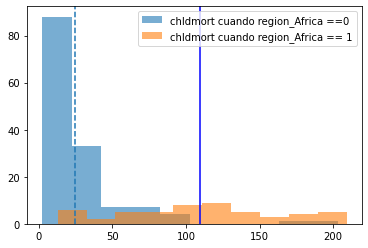

In [10]:
# Utiliza esta celda para realizar el llamado a la función para África y la primera variable
graficar_variables(df, my_cols[0], "region_Africa")

In [109]:
test_hipotesis(df, "femlab", "region_Africa")

{'t': -1.783872878266046,
 'pvalue': 0.0761771840435915,
 'ceros_mean': 0.6761015881858174,
 'unos_mean': 0.7299098010156667,
 'dif_medias': -0.05380821282984927}

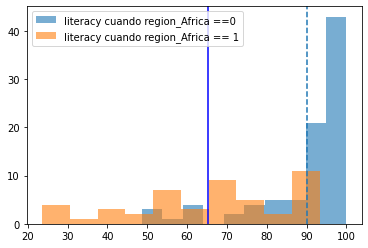

In [110]:
# Utiliza esta celda para realizar el llamado a la función para África y la segunda variable
graficar_variables(df, "literacy", "region_Africa")

In [111]:
test_hipotesis(df, "literacy", "region_Africa")

{'t': 8.909991173873896,
 'pvalue': 3.3857112156459963e-15,
 'ceros_mean': 90.19857935471968,
 'unos_mean': 65.30851067887976,
 'dif_medias': 24.890068675839927}

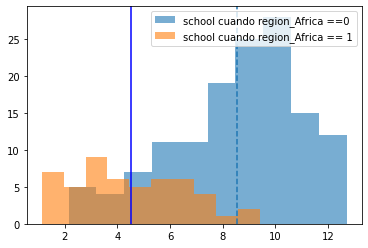

In [112]:
# Utiliza esta celda para realizar el llamado a la función para África y la tercera variable
graficar_variables(df, "school", "region_Africa")

In [113]:
test_hipotesis(df, "school", "region_Africa")

{'t': 10.415811831777058,
 'pvalue': 2.6352830456717332e-20,
 'ceros_mean': 8.552311427401799,
 'unos_mean': 4.522875827901504,
 'dif_medias': 4.029435599500295}

**Comentarios**: En la primera no rechazo la hipotesis nula, porque se puede ver que no existe una diferencia sustancial en el grafico y se comprueba con el p-value. Para la segunda y tercera variable, si existe una diferencia sustancial con un p-value de menor a 0.05, por lo cual se rechaza la hipotesis nula, esto se puede deber a existe una relacion en estos casos de los años de escolaridad con el alfabetismo

**Asia**

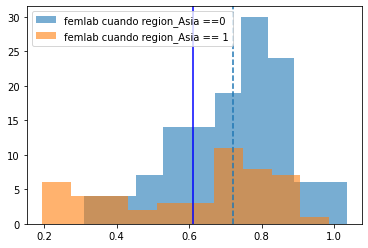

In [114]:
# Utiliza esta celda para realizar el llamado a la función para Asia y la primera variable
graficar_variables(df, "femlab", "region_Asia")

In [115]:
test_hipotesis(df, "femlab", "region_Asia")

{'t': 3.7455196595318414,
 'pvalue': 0.00024413257519365062,
 'ceros_mean': 0.7223421863745897,
 'unos_mean': 0.6113142879033575,
 'dif_medias': 0.11102789847123218}

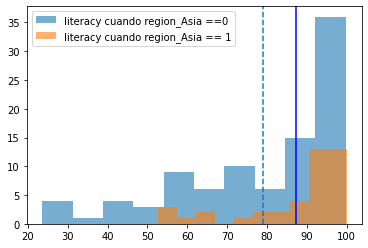

In [116]:
# Utiliza esta celda para realizar el llamado a la función para Asia y la segunda variable
graficar_variables(df, "literacy", "region_Asia")

In [117]:
test_hipotesis(df, "literacy", "region_Asia")

{'t': -2.3336279461015885,
 'pvalue': 0.021114460773250368,
 'ceros_mean': 78.99281917734349,
 'unos_mean': 87.3573166451803,
 'dif_medias': -8.364497467836813}

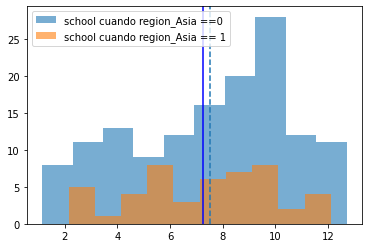

In [118]:
# Utiliza esta celda para realizar el llamado a la función para Asia y la tercera variable
graficar_variables(df, "school", "region_Asia")

In [119]:
test_hipotesis(df, "school", "region_Asia")

{'t': 0.5363879996523622,
 'pvalue': 0.5923313578645574,
 'ceros_mean': 7.527142846584319,
 'unos_mean': 7.261111130317052,
 'dif_medias': 0.26603171626726674}

**Comentarios**: Para la primera variable, si existe una diferencia sustancial con un p-value de menor a 0.05, por lo cual se rechaza la hipotesis nula. En la segunda y tercera no rechazo la hipotesis nula, porque se puede ver que no existe una diferencia sustancial en el grafico y se comprueba con el p-value, esto se puede deber a existe una relacion en estos casos de los años de escolaridad con el alfabetismo

**Américas**

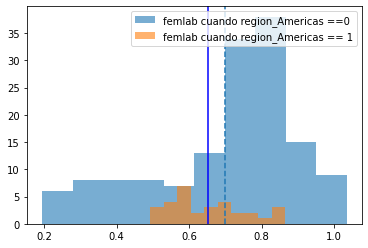

In [120]:
# Utiliza esta celda para realizar el llamado a la función para Américas y la primera variable
graficar_variables(df, "femlab", "region_Americas")

In [121]:
test_hipotesis(df, "femlab", "region_Americas")

{'t': 1.3731113408683462,
 'pvalue': 0.1714745430099794,
 'ceros_mean': 0.700280820772256,
 'unos_mean': 0.6507483913052466,
 'dif_medias': 0.04953242946700931}

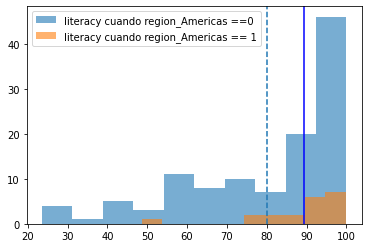

In [122]:
# Utiliza esta celda para realizar el llamado a la función para Américas y la segunda variable
graficar_variables(df, "literacy", "region_Americas")

In [123]:
test_hipotesis(df, "literacy", "region_Americas")

{'t': -1.953805549546212,
 'pvalue': 0.05282297025501064,
 'ceros_mean': 80.18217380357825,
 'unos_mean': 89.30124988555909,
 'dif_medias': -9.119076081980836}

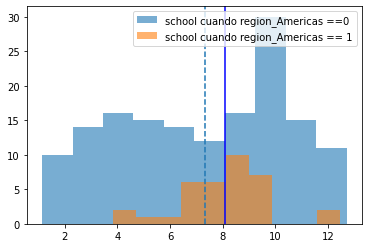

In [124]:
# Utiliza esta celda para realizar el llamado a la función para Américas y la tercera variable
graficar_variables(df, "school", "region_Americas")

In [125]:
test_hipotesis(df, "school", "region_Americas")

{'t': -1.362827174571195,
 'pvalue': 0.17458464986808925,
 'ceros_mean': 7.318845326604405,
 'unos_mean': 8.072857080187118,
 'dif_medias': -0.7540117535827129}

**Comentarios**: Para la primera variable, si existe una diferencia sustancial con un p-value de menor a 0.05, por lo cual se rechaza la hipotesis nula. En la segunda y tercera no rechazo la hipotesis nula, porque se puede ver que no existe una diferencia sustancial en el grafico y se comprueba con el p-value, esto se puede deber a existe una relacion en estos casos de los años de escolaridad con el alfabetismo

**Europa**

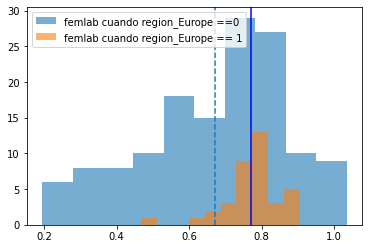

In [126]:
# Utiliza esta celda para realizar el llamado a la función para Europa y la primera variable
graficar_variables(df, "femlab", "region_Europe")

In [127]:
test_hipotesis(df, "femlab", "region_Europe")

{'t': -3.063523760334362,
 'pvalue': 0.0025335604834548654,
 'ceros_mean': 0.6704557155924183,
 'unos_mean': 0.7716324264938766,
 'dif_medias': -0.1011767109014583}

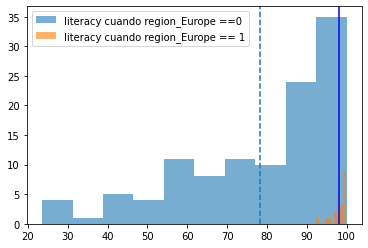

In [128]:
# Utiliza esta celda para realizar el llamado a la función para Europa y la segunda variable
graficar_variables(df, "literacy", "region_Europe")

In [129]:
test_hipotesis(df, "literacy", "region_Europe")

{'t': -4.71843149821332,
 'pvalue': 5.935608765865936e-06,
 'ceros_mean': 78.2926989698832,
 'unos_mean': 98.17727279663086,
 'dif_medias': -19.884573826747655}

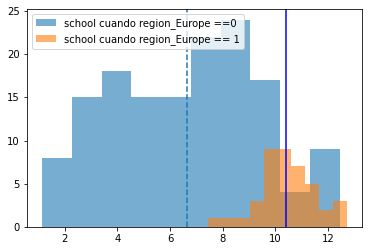

In [130]:
# Utiliza esta celda para realizar el llamado a la función para Europa y la tercera variable
graficar_variables(df, "school", "region_Europe")

In [131]:
test_hipotesis(df, "school", "region_Europe")

{'t': -8.524346217730443,
 'pvalue': 5.2091030233609194e-15,
 'ceros_mean': 6.632993203442113,
 'unos_mean': 10.421544679781281,
 'dif_medias': -3.788551476339168}

**Comentarios**: En este caso para 3 variables se rechaza la hipotesis nula, lo que se ve en los 3 graficos y los 3 p values menores 0.05, esto se puede a deber a la condiciones generales que tiene europa, que se diferencia de los otros continentes con gran diferencia.

**Oceanía**

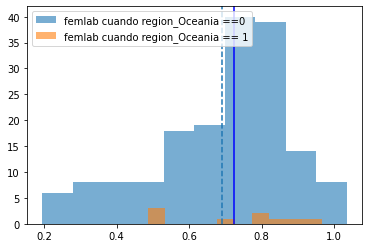

In [132]:
# Utiliza esta celda para realizar el llamado a la función para Oceanía y la primera variable
graficar_variables(df, "femlab", "region_Oceania")

In [133]:
test_hipotesis(df, "femlab", "region_Oceania")

{'t': -0.5346624412260647,
 'pvalue': 0.5935619441213259,
 'ceros_mean': 0.6899011897011882,
 'unos_mean': 0.7234222326013777,
 'dif_medias': -0.033521042900189535}

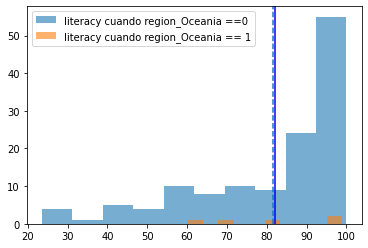

In [134]:
# Utiliza esta celda para realizar el llamado a la función para Oceanía y la segunda variable
graficar_variables(df, "literacy", "region_Oceania")

In [135]:
test_hipotesis(df, "literacy", "region_Oceania")

{'t': -0.05211194697890982,
 'pvalue': 0.9585176817316319,
 'ceros_mean': 81.51596141228309,
 'unos_mean': 81.98000030517578,
 'dif_medias': -0.4640388928926882}

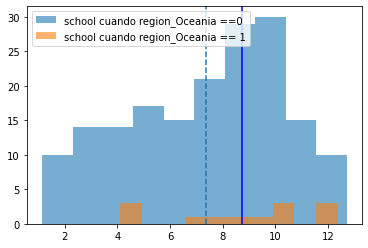

In [136]:
# Utiliza esta celda para realizar el llamado a la función para Oceanía y la tercera variable
graficar_variables(df, "school", "region_Oceania")

In [137]:
test_hipotesis(df, "school", "region_Oceania")

{'t': -1.592662858961424,
 'pvalue': 0.1129338375511172,
 'ceros_mean': 7.365904749461583,
 'unos_mean': 8.715384740095876,
 'dif_medias': -1.3494799906342934}

**Comentarios**: En este caso para 3 variables no se rechaza la hipotesis nula, lo que se ve en los 3 graficos y los 3 p values mayores 0.05